# **Challenge for “Merit Prize” 2024/2025**
##### Grupo 41
##### Raquel Rodrigues (NºIST 106322) e Leonor Figueira (NºIST 106157)

##### NÃO ESQUECER:

the target variable indicated is changed to “malignant" instead of  "has the client subscribed to a term deposit".

#### Pergunta 1)

In [9]:
from sklearn import datasets

# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target  # The target is already in [0, 1] format

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Create StratifiedShuffleSplit cross-validation (with stratification)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform logistic regression
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict on training data and calculate accuracy
train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

print(f"Accuracy on training data of logistic regression model: {train_accuracy:.5f}")

# Predict on test data and calculate accuracy
test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Accuracy on testing data of logistic regression model: {test_accuracy:.5f}")


Accuracy on training data of logistic regression model: 0.95980
Accuracy on testing data of logistic regression model: 0.97661


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data and then fits the Logistic Regression model
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

# Evaluate with cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print(f"Cross-validated accuracy: {scores.mean():.5f} ± {scores.std():.5f}")


Cross-validated accuracy: 0.98246 ± 0.01046


#### Pergunta 2)

Silhouette scores: [0.6877464407970099, 0.6038661048011998, 0.44560148147180023, 0.38940684720393925, 0.32843431055261213, 0.12895831773233057, 0.14858391516458752, 0.1669533500472784, 0.18473175709560186, 0.2097511754805492, 0.20931635223584158, 0.18132183853015885, 0.17407553515769242]
Optimal number of clusters (k) 2
Spearman correlation: -0.6319, P-value: 0.0205


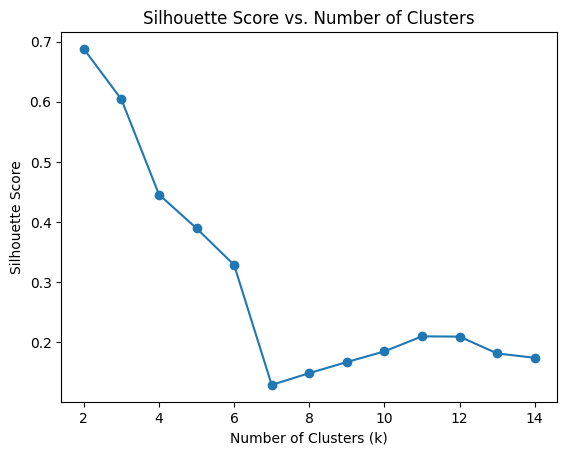

In [32]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr

# Range of cluster numbers to evaluate
k_values = range(2, 15)  # Start with 2 clusters, up to 10 clusters
silhouette_scores = []

# Load dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target  # The target is already in [0, 1] format

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform EM clustering for different k
for k in k_values:
    # Initialize and fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, init_params='random_from_data', n_init=1, random_state=42)
    gmm.fit(X_train)
    
    # Predict cluster labels
    cluster_labels = gmm.predict(X_train)
    
    # Evaluate Silhouette Score
    score = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(score)

# Find the optimal k
optimal_k = k_values[np.argmax(silhouette_scores)]

print("Silhouette scores:", silhouette_scores)
print("Optimal number of clusters (k)", optimal_k)

spearman_corr, spearman_p_value = spearmanr(k_values, silhouette_scores)
print(f"Spearman correlation: {spearman_corr:.4f}, P-value: {spearman_p_value:.4f}")

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

(398, 30)
(569, 30)
Explained Variability by the top 3 components is 72.64%
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1
 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0

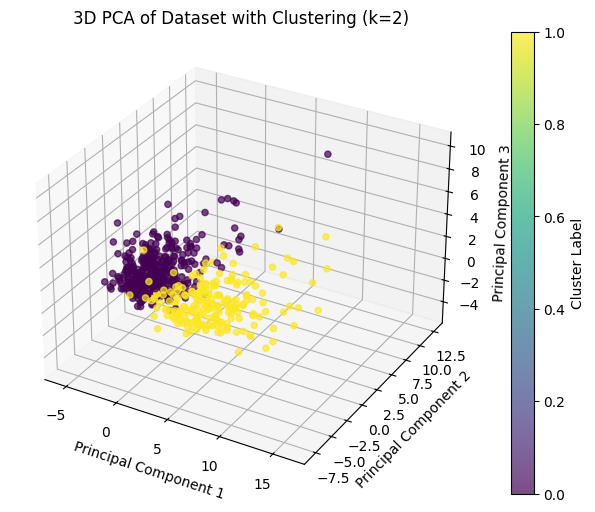

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Nisto não se faz divisão entre treino e teste?

print(X_train.shape)  # (398, n_features)
print(scaled_data.shape)  # (569, n_features)

# Initialize PCA
pca = PCA(n_components=3)

# Fit PCA to scaled data
pca_result = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
total_variability = (explained_variance[0] + explained_variance[1] + explained_variance[2])*100     # Percentage

print(f"Explained Variability by the top 3 components is {total_variability:.2f}%")

gmm = GaussianMixture(n_components=2, init_params='random_from_data', n_init=1, random_state=42)
gmm.fit(scaled_data)

# Predict cluster labels
clusters = gmm.predict(scaled_data)

# Output the cluster labels
print(clusters)

from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting toolkit

# Create a 3D scatter plot\n««",
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')  # Define 3D axis",
# Plot the 3D scatter plot using the first three principal components",
sc = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=clusters, cmap='viridis', alpha=0.7)
# Add title and labels for the axes\n",
ax.set_title('3D PCA of Dataset with Clustering (k=2)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
# Add a color bar to indicate cluster labels",
plt.colorbar(sc, label='Cluster Label')
plt.show()

#### Pergunta 3)

#### Pergunta 4)

#### Pergunta 5)

#### Pergunta 6)